# **Project: TMDB Movie Dataset Analysis**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset
I choose the TMDb movie dataset. the dataset contains information about 10,000 movies,  including id, popularity, budget, revenue, original title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production companies, release date, vote count, vote average, release year, budget adj, revenue adj.

### Questions:


1.   What are the 10 movies with the highest production budget?
2.   What are the 10 movies with the highest revenue?
3.   What are the top 10 most profitable movies in the market?
4.   What are the top ten movies with the highest popularity?
5.   What are the top ten movies with the highest vote average?
6.   What are the 10 movies with the highest runtime?
7.   What is the average movie runtime over time?
8.   What are the average movie profits over time?
9.   How many movies per year?
10.  In which year has the highest or lowest production of movies?
11.  What are the top 10 directors in 2014, according to the vote?
12.  How many movies per genre?
13.  How many movies per director?
14.  What are the top 10 most directors who have maximum movies?
15.  What are the most profitable months?




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [2]:
df = pd.read_csv('/content/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8adc9cf10>,
      dtype=object)

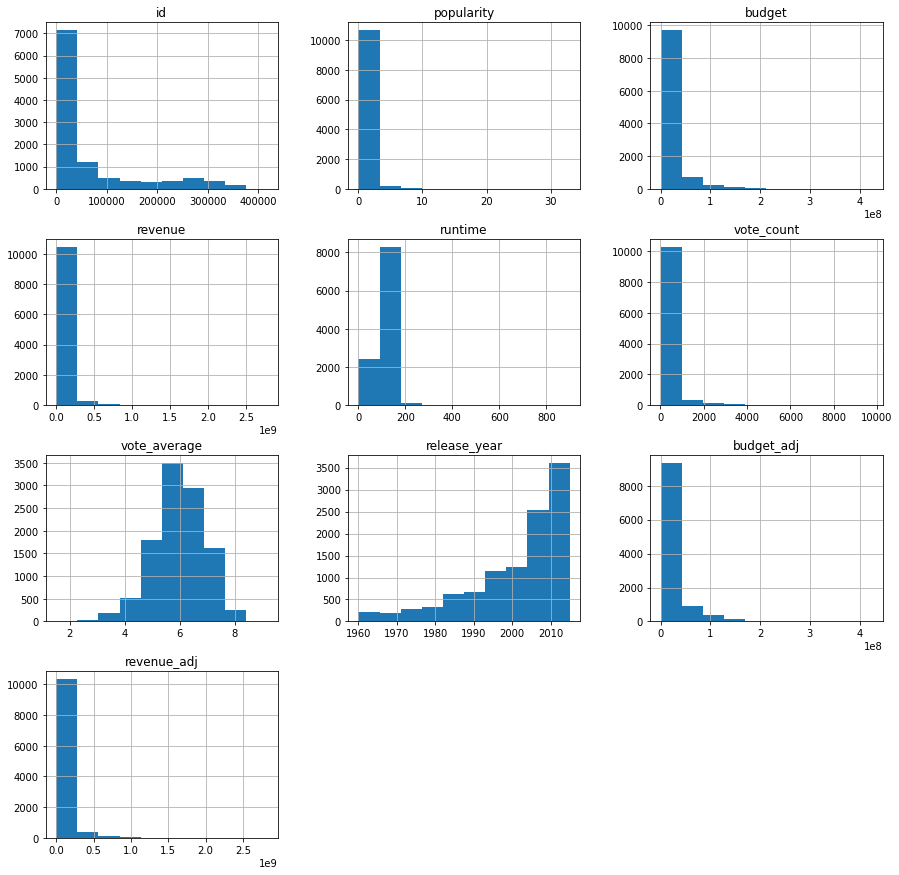

In [8]:
df.hist(figsize=(15,15))


### Data Cleaning

In [9]:
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj','production_companies','keywords'], axis=1, inplace=True)

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [13]:
df.dropna(subset=['cast','director','genres'], how='any', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_count      10731 non-null  int64  
 11  vote_average    10731 non-null  float64
 12  release_year    10731 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [15]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


In [16]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (What are the 10 movies with the highest production budget?)

In [17]:
ten_budget = df.sort_values(['budget'], ascending = False)
ten_budget = ten_budget.loc[:,['original_title','budget']].head(10)
print('The 10 movies with the highest production budget:')
ten_budget

The 10 movies with the highest production budget:


,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000
4411,John Carter,260000000
1929,Tangled,260000000
7394,Spider-Man 3,258000000
5508,The Lone Ranger,255000000
1389,Harry Potter and the Half-Blood Prince,250000000


Text(0, 0.5, 'original title\n')

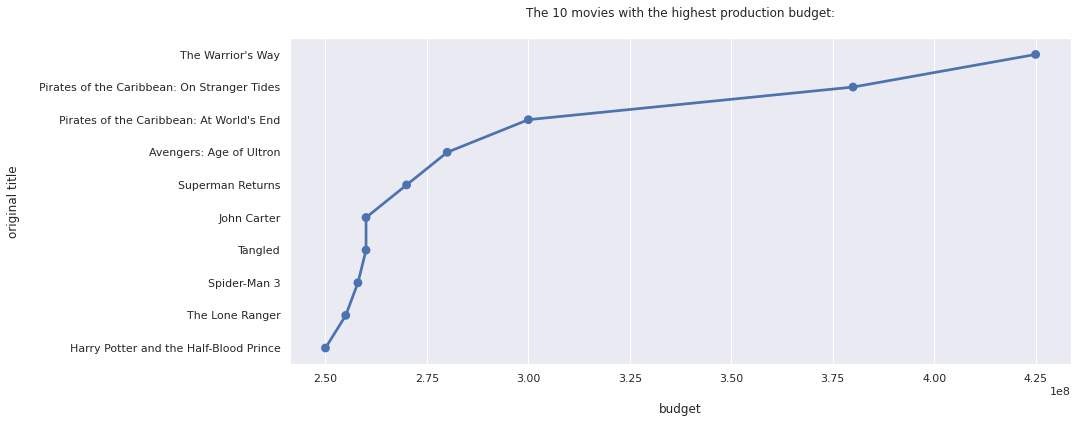

In [18]:
sns.set(rc={'figure.figsize':(14,6)})
ax = sns.pointplot(x = ten_budget['budget'], y = ten_budget['original_title'])
ax.set_title("The 10 movies with the highest production budget:\n")
ax.set_xlabel("\nbudget")
ax.set_ylabel("original title\n")

### Research Question 2 (What are the 10 movies with the highest revenue?)

In [19]:
ten_revenue = df.sort_values(['revenue'], ascending = False)
ten_revenue = ten_revenue.loc[:,['original_title','revenue']].head(10)
print('The 10 movies with the highest revenue:')
pd.DataFrame(ten_revenue)

The 10 movies with the highest revenue:


,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


Text(0, 0.5, 'original title\n')

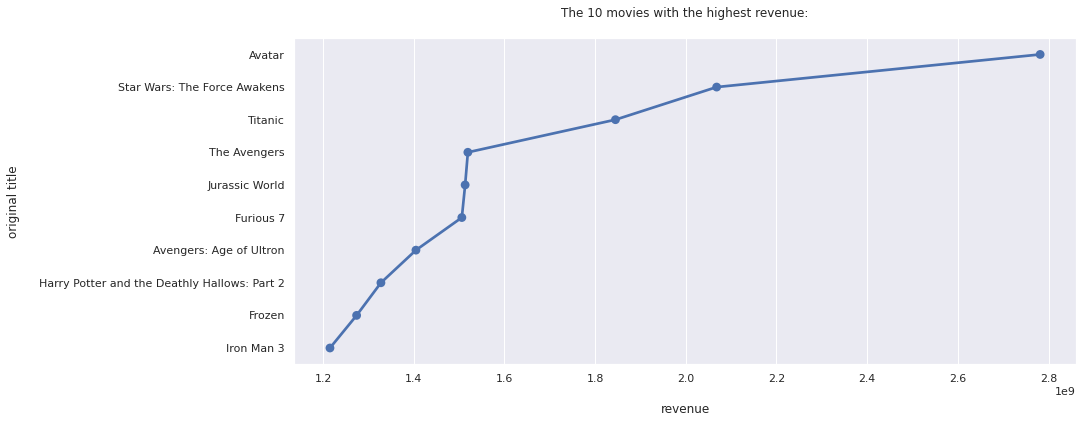

In [20]:
ax = sns.pointplot(x = ten_revenue['revenue'], y = ten_revenue['original_title'])
ax.set_title("The 10 movies with the highest revenue:\n")
ax.set_xlabel("\nrevenue")
ax.set_ylabel("original title\n")

### Research Question 3 (What are the top 10 most profitable movies in the market?)

In [21]:
df['profits'] = df['revenue'] - df['budget']
top_ten_profit = df.sort_values(['profits'], ascending = False)
top_ten_profit = top_ten_profit.loc[:,['original_title','profits']].head(10)
print('The top 10 most profitable movies in the market:')
pd.DataFrame(top_ten_profit)

The top 10 most profitable movies in the market:


,original_title,profits
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


Text(0, 0.5, 'original title\n')

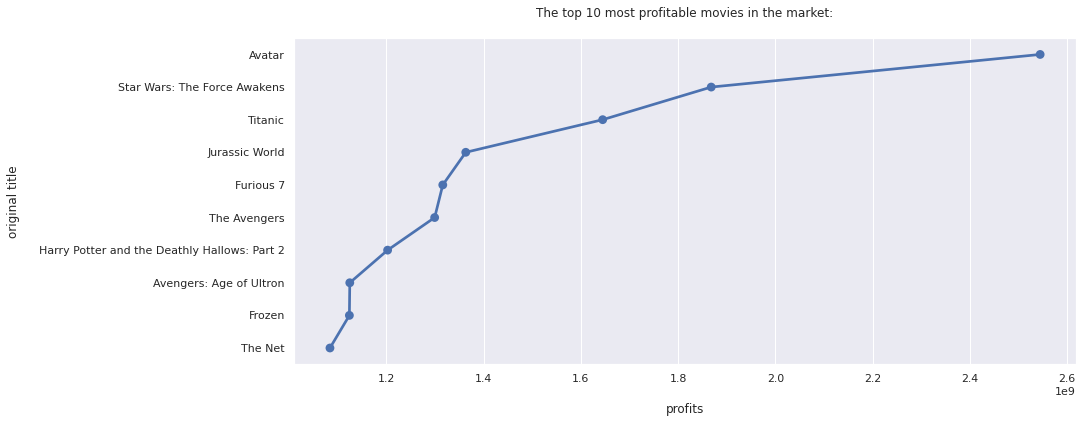

In [22]:
ax = sns.pointplot(x = top_ten_profit['profits'], y = top_ten_profit['original_title'])
ax.set_title("The top 10 most profitable movies in the market:\n")
ax.set_xlabel("\nprofits")
ax.set_ylabel("original title\n")

### Research Question 4 (What are the top ten movies with the highest popularity?)

In [23]:
top_ten_popularity = df.sort_values(['popularity'], ascending = False)
top_ten_popularity = top_ten_popularity.loc[:,['original_title','popularity']].head(10)
print('The top ten movies with the highest popularity:')
pd.DataFrame(top_ten_popularity)

The top ten movies with the highest popularity:


,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


Text(0, 0.5, 'original title\n')

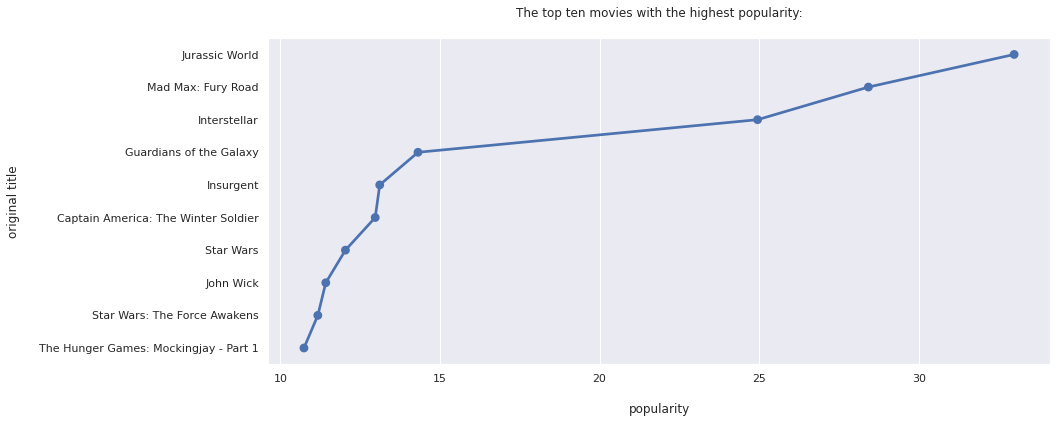

In [24]:
ax = sns.pointplot(x = top_ten_popularity['popularity'], y = top_ten_popularity['original_title'])
ax.set_title("The top ten movies with the highest popularity:\n")
ax.set_xlabel("\npopularity")
ax.set_ylabel("original title\n")

### Research Question 5 (What are the top ten movies with the highest vote average?)

In [25]:
top_ten_vote_average  = df.sort_values(['vote_average'], ascending = False)
top_ten_vote_average = top_ten_vote_average.loc[:,['original_title','vote_average']].head(10)
print('The top ten movies with the highest vote average:')
pd.DataFrame(top_ten_vote_average)

The top ten movies with the highest vote average:


,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
1200,Black Mirror: White Christmas,8.8
6911,Pink Floyd: Pulse,8.7
3690,The Art of Flight,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
8839,Dave Chappelle: Killin' Them Softly,8.5
8411,Queen - Rock Montreal,8.5
4178,The Shawshank Redemption,8.4
2334,Rush: Beyond the Lighted Stage,8.4
609,The Jinx: The Life and Deaths of Robert Durst,8.4


Text(0, 0.5, 'original title\n')

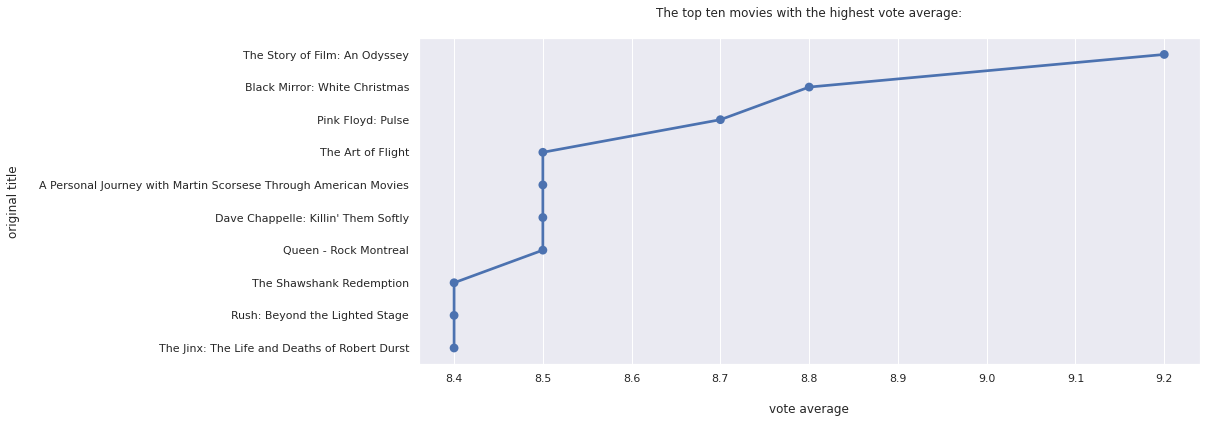

In [26]:
ax = sns.pointplot(x = top_ten_vote_average['vote_average'], y = top_ten_vote_average['original_title'])
ax.set_title("The top ten movies with the highest vote average:\n")
ax.set_xlabel("\nvote average")
ax.set_ylabel("original title\n")

### Research Question 6 (What are the 10 movies with the highest runtime?)

In [27]:
ten_runtime = df.sort_values(['runtime'], ascending = False)
ten_runtime = ten_runtime.loc[:,['original_title','runtime']].head(10)
print('The 10 movies with the highest runtime:')
pd.DataFrame(ten_runtime)

The 10 movies with the highest runtime:


,original_title,runtime
3894,The Story of Film: An Odyssey,900
4041,Taken,877
2722,Band of Brothers,705
6176,Shoah,566
6894,Planet Earth,550
2214,The Pacific,540
3356,John Adams,501
1865,Life,500
3141,Generation Kill,470
2170,The Pillars of the Earth,421


Text(0, 0.5, 'original title\n')

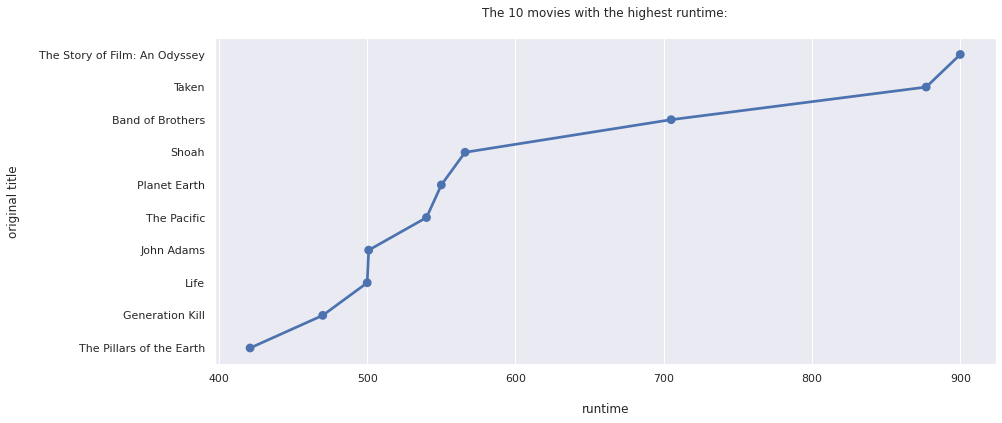

In [28]:
ax = sns.pointplot(x = ten_runtime['runtime'], y = ten_runtime['original_title'])
ax.set_title("The 10 movies with the highest runtime:\n")
ax.set_xlabel("\nruntime")
ax.set_ylabel("original title\n")

### Research Question 7 (What is the average movie runtime over time?)

In [29]:
average_runtime_over_time = df.groupby('release_year')['runtime'].mean()
average_runtime_over_time

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
1965    118.171429
1966    106.891304
1967    108.921053
1968    109.947368
1969    110.066667
1970    113.075000
1971    107.727273
1972    101.950000
1973    103.527273
1974    107.804348
1975    107.363636
1976    109.319149
1977    108.160714
1978    110.076923
1979    112.017544
1980    107.500000
1981    105.865854
1982    103.925926
1983    103.000000
1984    104.442308
1985    110.203704
1986    100.750000
1987    101.951613
1988    102.845070
1989    105.525926
1990    105.651515
1991    105.112782
1992    107.113636
1993    107.587571
1994    106.913043
1995    107.574713
1996    106.167488
1997    106.675393
1998    105.061905
1999    108.861607
2000    104.620536
2001    108.024896
2002    106.969697
2003    100.679715
2004    105.364821
2005    103.481994
2006    102.574257
2007    100.601852
2008    100.596708
2009     98.358095
2010     99.298947
2011     98.507519

Text(0, 0.5, 'runtime\n')

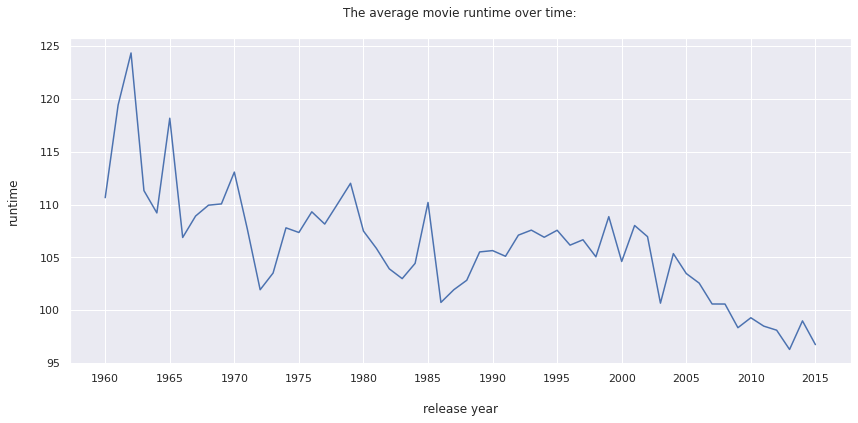

In [30]:
average_runtime_over_time.plot(xticks = np.arange(1960,2016,5))
plt.title("The average movie runtime over time:\n")
plt.xlabel("\nrelease year")
plt.ylabel("runtime\n")

### Research Question 8 (What are the average movie profits over time?)

In [31]:
average_profits_over_time = df.groupby('release_year')['profits'].mean()
average_profits_over_time

release_year
1960    3.842127e+06
1961    9.405909e+06
1962    5.026804e+06
1963    3.355103e+06
1964    7.178539e+06
1965    1.108219e+07
1966    5.909106e+05
1967    1.676796e+07
1968    5.073526e+06
1969    6.727600e+06
1970    1.083150e+07
1971    5.980247e+06
1972    1.146127e+07
1973    2.106891e+07
1974    1.599065e+07
1975    2.048207e+07
1976    1.444374e+07
1977    3.605363e+07
1978    1.785819e+07
1979    2.508738e+07
1980    1.802772e+07
1981    1.708352e+07
1982    2.494628e+07
1983    2.235527e+07
1984    1.832993e+07
1985    1.969492e+07
1986    1.915204e+07
1987    2.219878e+07
1988    1.983179e+07
1989    3.026124e+07
1990    3.049428e+07
1991    2.436366e+07
1992    3.515445e+07
1993    2.924024e+07
1994    2.644686e+07
1995    3.615205e+07
1996    2.278054e+07
1997    3.091145e+07
1998    2.377864e+07
1999    2.495749e+07
2000    2.333036e+07
2001    3.223294e+07
2002    3.315138e+07
2003    3.166685e+07
2004    3.134685e+07
2005    2.541150e+07
2006    2.220756e+07


Text(0, 0.5, 'profits\n')

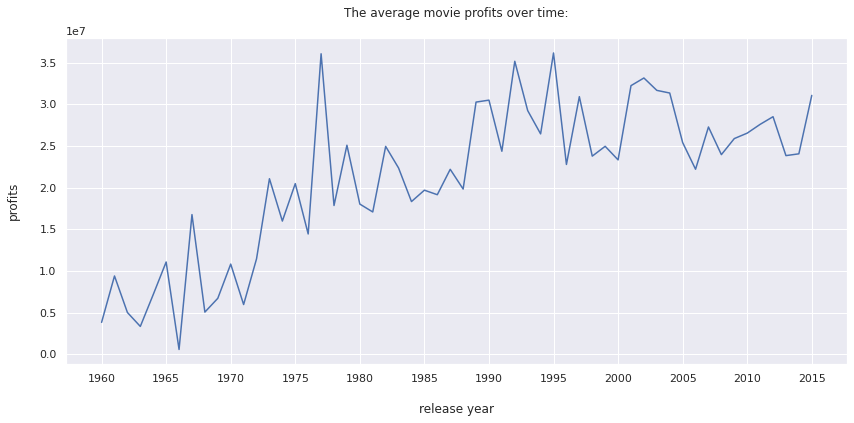

In [32]:
average_profits_over_time.plot(xticks = np.arange(1960,2016,5))
plt.title("The average movie profits over time:\n")
plt.xlabel("\nrelease year")
plt.ylabel("profits\n")

### Research Question 9 (How many movies per year?)




In [33]:
num_movies = df.groupby('release_year').count()['id']
num_movies

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     38
1968     38
1969     30
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     56
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    104
1985    108
1986    120
1987    124
1988    142
1989    135
1990    132
1991    133
1992    132
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    224
2001    241
2002    264
2003    281
2004    307
2005    361
2006    404
2007    432
2008    486
2009    525
2010    475
2011    532
2012    574
2013    649
2014    682
2015    617
Name: id, dtype: int64

Text(0, 0.5, 'release year\n')

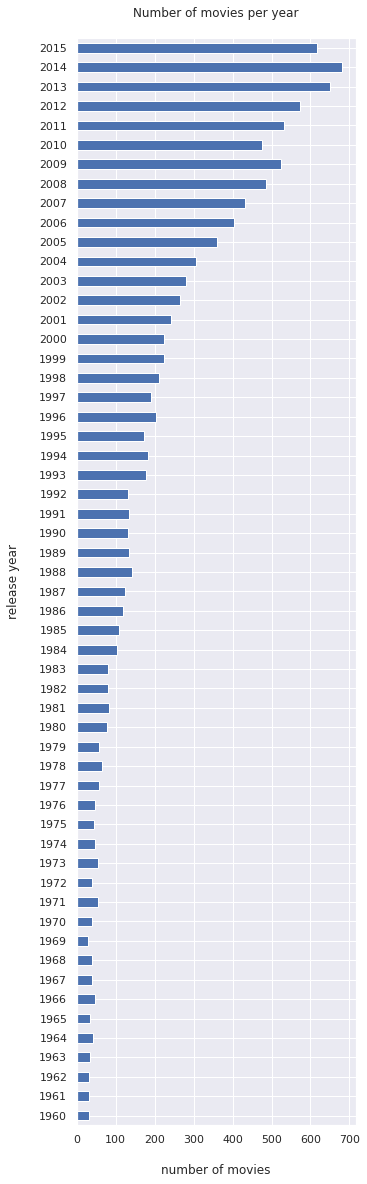

In [34]:
num_movies.plot(kind='barh', figsize=(5,20))
plt.title("Number of movies per year\n")
plt.xlabel('\nnumber of movies',)
plt.ylabel('release year\n')

Text(0, 0.5, 'number of movies\n')

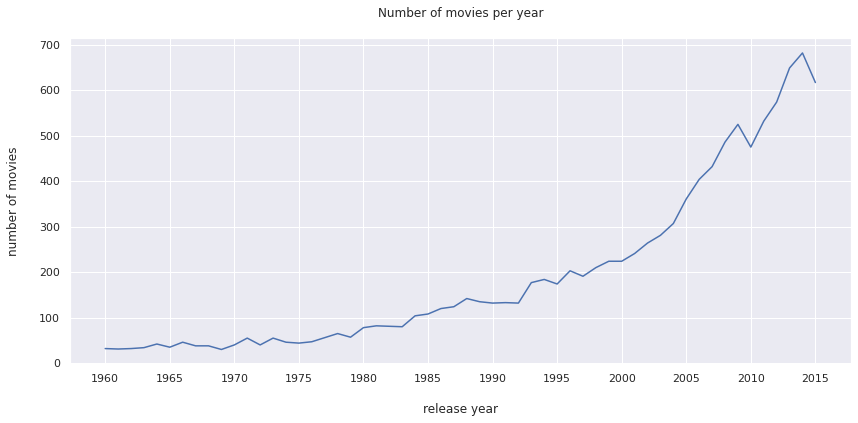

In [35]:
num_movies.plot(figsize = (14,6),xticks = np.arange(1960,2016,5))
plt.title("Number of movies per year\n")
plt.xlabel('\nrelease year',)
plt.ylabel('number of movies\n')

### Research Question 10 (In which year has the highest or lowest production of movies?)

In [36]:
num_movies = num_movies.sort_values()
print('A year has the lowest production:\n',num_movies.head(1))
print('A year has the highest production:\n',num_movies.tail(1))

A year has the lowest production:
 release_year
1969    30
Name: id, dtype: int64
A year has the highest production:
 release_year
2014    682
Name: id, dtype: int64


### Research Question 11 (What are the top 10 directors in 2014, according to the vote?)

In [37]:
best_director = df.loc[df['release_year']==2014].groupby('director').max().vote_average
best_director = best_director.sort_values(ascending=False)
best_director

director
Carl Tibbetts                    8.8
Paul Dugdale                     8.3
Damien Chazelle                  8.2
Stephen Daldry|Brett Sullivan    8.1
Tomm Moore                       8.0
                                ... 
Giorgio Serafini|James Coyne     3.1
Mark Atkins                      3.0
Ravi Dhar                        2.8
Paul Tarnopol                    2.4
James Kondelik                   2.4
Name: vote_average, Length: 664, dtype: float64

director
Carl Tibbetts                    8.8
Paul Dugdale                     8.3
Damien Chazelle                  8.2
Stephen Daldry|Brett Sullivan    8.1
Tomm Moore                       8.0
Morten Tyldum                    8.0
Patrick Osborne                  8.0
Christopher Nolan                8.0
Xavier Dolan                     8.0
Dan Storey                       7.9
Name: vote_average, dtype: float64

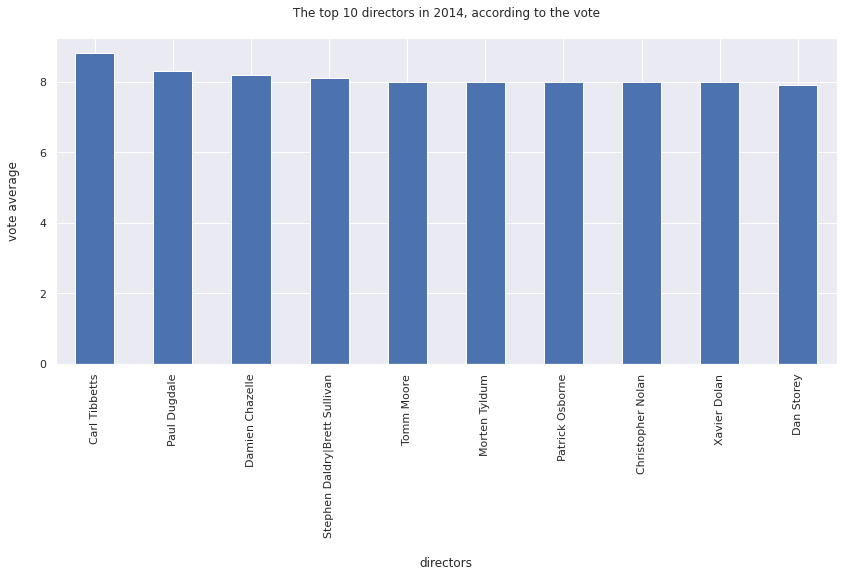

In [38]:
(best_director.head(10)).plot(kind='bar',figsize = (14,6))
plt.title("The top 10 directors in 2014, according to the vote\n")
plt.xlabel('\ndirectors',)
plt.ylabel('vote average\n')

best_director.head(10)

### Research Question 12  (How many movies per genre?)

In [39]:
def sep_data(column):
  data = df[column].str.cat(sep = '|')
  data = pd.Series(data.split('|'))
  return data

genres_data = sep_data('genres')
genres_data = genres_data.value_counts(ascending=False)
genres_data

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
dtype: int64

Text(0, 0.5, 'number of movies\n')

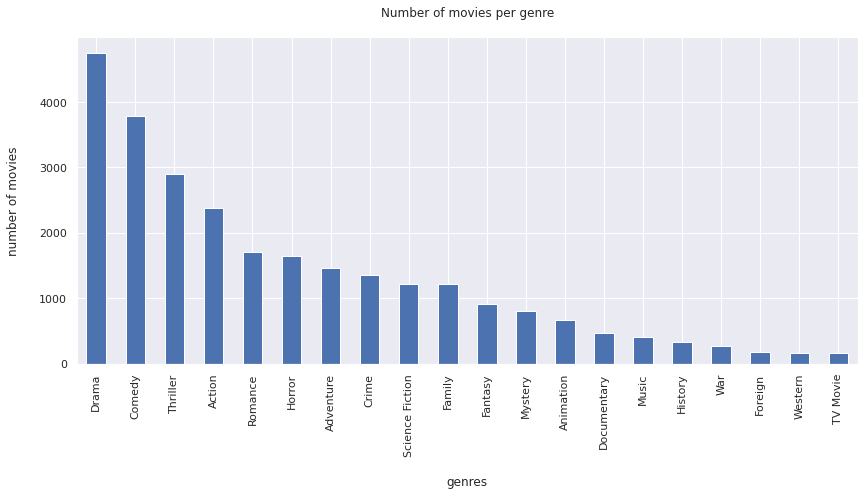

In [40]:
genres_data.plot(kind='bar',figsize = (14,6))
plt.title("Number of movies per genre\n")
plt.xlabel('\ngenres',)
plt.ylabel('number of movies\n')

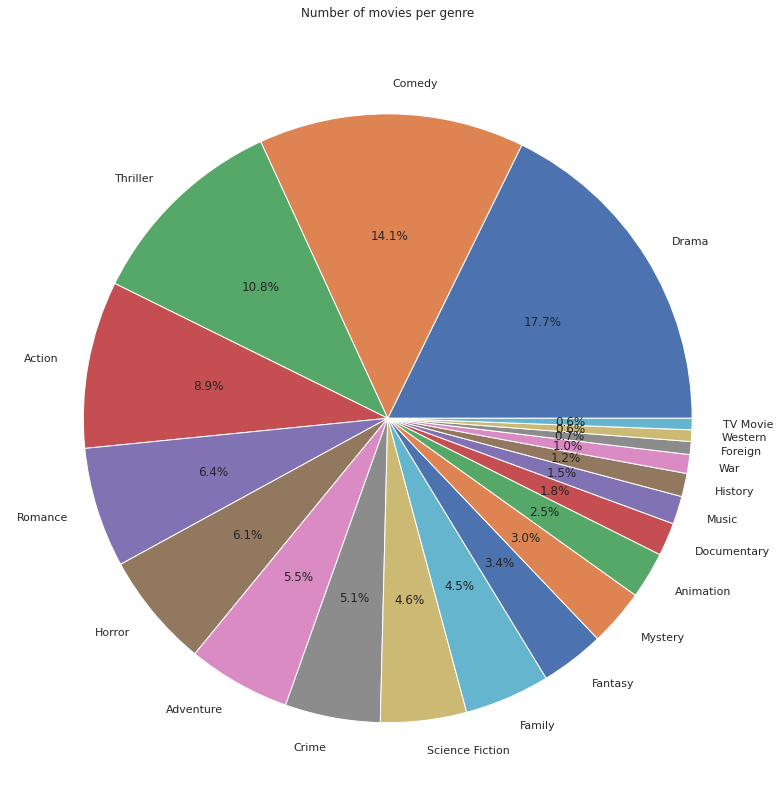

In [41]:
genres_data.plot(kind="pie",figsize = (14,14),autopct="%1.1f%%")
plt.title("Number of movies per genre\n")
plt.ylabel('');
plt.xlabel('');

### Research Question 13 (How many movies per director?)



In [42]:
num_movies_per_director = df.groupby('director').count()['id']
num_movies_per_director = num_movies_per_director.sort_values(ascending = False)
num_movies_per_director

director
Woody Allen           45
Clint Eastwood        34
Steven Spielberg      29
Martin Scorsese       28
Ridley Scott          23
                      ..
Lili Fini Zanuck       1
Liev Schreiber         1
Liam Lynch             1
Lewis John Carlino     1
 FrÃ©dÃ©ric Jardin     1
Name: id, Length: 5018, dtype: int64

### Research Question 14 (What are the top 10 most directors who have maximum movies?)


director
Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      28
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Name: id, dtype: int64

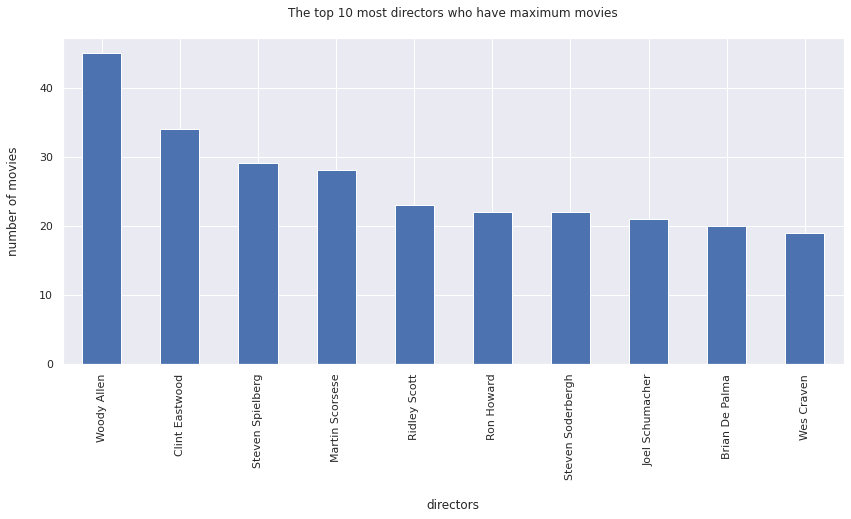

In [43]:
(num_movies_per_director.head(10)).plot(kind='bar',figsize = (14,6))
plt.title("The top 10 most directors who have maximum movies\n")
plt.xlabel('\ndirectors',)
plt.ylabel('number of movies\n')

num_movies_per_director.head(10)

### Research Question 15 (What are the most profitable months?)


In [44]:
df['month'] = df['release_date'].dt.month
profits_in_months = df.groupby('month')['profits'].mean()
profits_in_months

month
1     7.520356e+06
2     1.546279e+07
3     2.372433e+07
4     2.002254e+07
5     4.267988e+07
6     5.312051e+07
7     3.803586e+07
8     1.587473e+07
9     1.008758e+07
10    1.435037e+07
11    3.828375e+07
12    3.975926e+07
Name: profits, dtype: float64

Text(0, 0.5, 'profits\n')

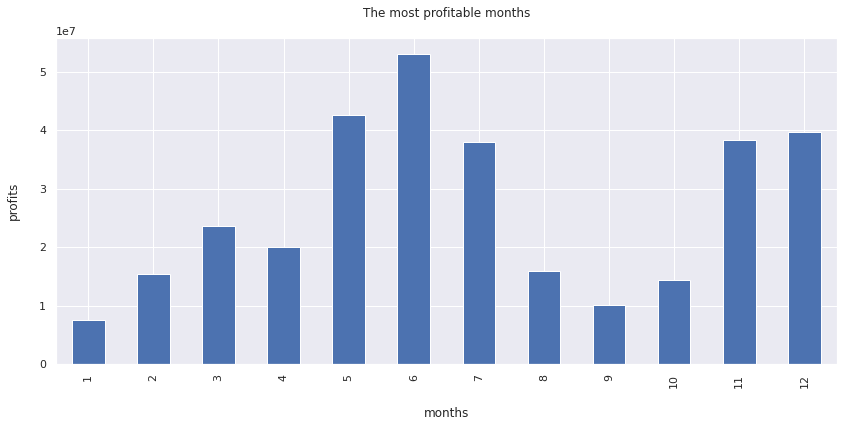

In [45]:
profits_in_months.plot(kind='bar',figsize = (14,6))
plt.title("The most profitable months\n")
plt.xlabel('\nmonths',)
plt.ylabel('profits\n')

<a id='conclusions'></a>
## Conclusions


- The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Avengers: Age of Ultron, Superman Returns, John Carter, Tangled, Spider-Man 3, The Lone Ranger, Harry Potter and the Half-Blood Prince **are movies with the highest production budget.**

- Avatar, Star Wars: The Force Awakens, Titanic, The Avengers, Jurassic World, Furious 7, Avengers: Age of Ultron, Harry Potter and the Deathly Hallows: Part 2, Frozen, Iron Man 3 **are movies with the highest revenue.**	

- Avatar, Star Wars: The Force Awakens, Titanic, The Avengers, Jurassic World, Furious 7, Avengers: Age of Ultron, Harry Potter and the Deathly Hallows: Part 2, Frozen, The Net **are the top 10 most profitable movies in the market.**	

- Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent, Captain America: The Winter Soldier, Star Wars, John Wick, Star Wars: The Force Awakens,  The Hunger Games: Mockingjay - Part 1 **are the top ten movies with the highest popularity.**

- The Story of Film: An Odyssey, Black Mirror: White Christmas, Pink Floyd: Pulse, The Art of Flight, A Personal Journey with Martin Scorsese, Dave Chappelle: Killin' Them Softly, Queen - Rock Montreal, The Shawshank Redemption, Rush: Beyond the Lighted Stage, The Jinx: The Life and Deaths of Robert Durst **are the top ten movies with the highest vote average.**

- The Story of Film: An Odyssey, Taken, Band of Brothers, Shoah, Planet Earth, The Pacific, John Adams, Life, Generation Kill, The Pillars of the Earth **are the 10 movies with the highest runtime.**

- **I've noticed that the average movie runtime over time is a decreasing.**

- **I've noticed that the average movie profits over time vary, but most of them increase.**

- **I've noticed that the number of movies is increasing every year.**

- **2014 is a year that has the highest production of movies.**

- **1969 is a year that has the lowest production of movies.**

- Carl Tibbetts, Paul Dugdale, Damien Chazelle, Stephen Daldry, Brett Sullivan, Tomm Moore, Morten Tyldum, Patrick Osborne, Christopher Nolan, Xavier Dolan, Dan Storey **are the top 10 directors in 2014, according to the vote.**

- **Drama is the most popular genre, following by Comedy, Thriller, Action, Romance, Horror, etc.**

- Woody Allen, Clint Eastwood, Steven Spielberg, Martin Scorsese, Ridley Scott, Ron Howard, Steven Soderbergh, Joel Schumacher, Brian De Palma, Wes Craven **are the top 10 most directors who have maximum movies.**   

- **Month 6 is the most profitable Month, following by Month 5, Month 12, Month 11, Month 7, Month 3, Month 4, Month 8, Month 2,  Month 10, Month 9, Month 1.**


## Limitations
- Missing values in the dataset affect the results.
- Duplicates values in the dataset affect the results.
- Some budget and revenue values in the dataset have zeros values.
- Incorrect data type.

## Resources
- https://pandas.pydata.org/docs/
- https://seaborn.pydata.org/
- https://github.com/udacity/data-analyst

